In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [6]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2512 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1047 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0735 - accuracy: 0.9768


In [9]:
model.save('digitAI.model')

In [10]:
loss, acc = model.evaluate(X_test, y_test)

loss, acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9692


(0.10361675173044205, 0.9692000150680542)

In [20]:
len(X_test)

10000

1/1 [==============================] - 0s 23ms/step


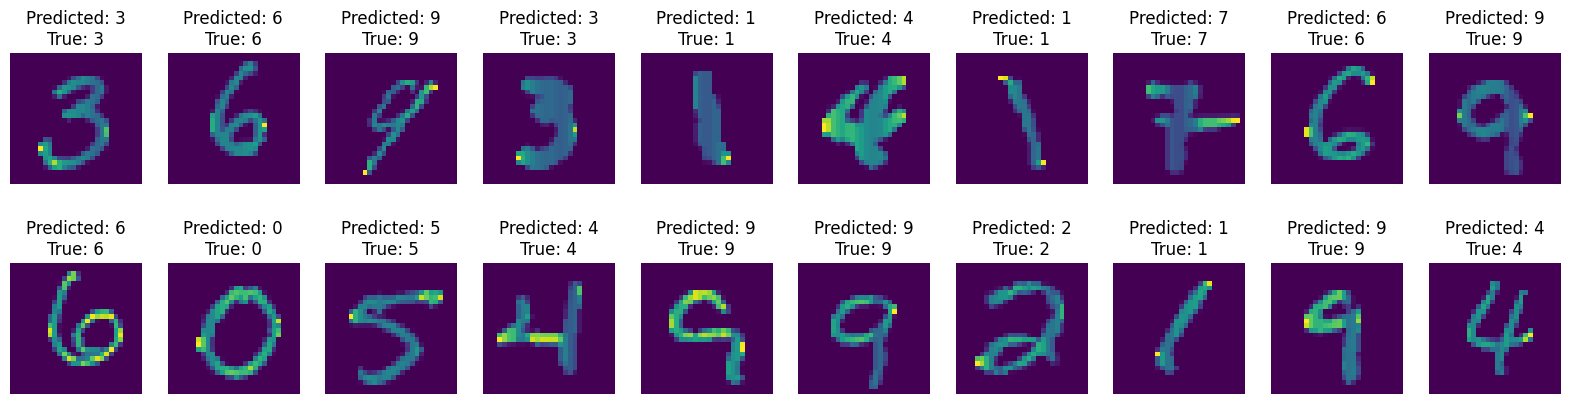

In [24]:
# prompt: for this notebook code generate graphs to show the digits

import numpy as np
import matplotlib.pyplot as plt

# Get the first 10 images from the test set
images = X_test[90:110]

# Predict the labels for these images
predictions = model.predict(images)

# Get the indices of the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = y_test[90:110]

# Create a figure with 10 subplots
fig, axes = plt.subplots(2, 10, figsize=(20, 5))

# Plot each image and its predicted and true labels
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='viridis')
    ax.set_title(f"Predicted: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    ax.axis('off')

# Show the plot
plt.show()
